# 🎓 **Taller 2.2: Análisis de Valores Faltantes - Dataset Remax**


## OBJETIVOS DEL TALLER:
* ✅Cuantificar y visualizar valores faltantes por columna y en porcentajes
* ✅ Analizar patrones de las columnas con datos faltantes
* ✅ Analizar el tipo de valor faltante (MCAR, MAR, MNAR)
* ✅ Aplicar técnicas de imputación
* ✅ Evaluar el impacto de las imputaciones.

## 📝 INSTRUCCIONES PARA ENTREGA:

1. **GUARDA ESTE NOTEBOOK** en tu Google Drive siguiendo esta convencion para el nombre del archivo:  NombreApellidoTemaDataset.ipynb
2. **COMPLETA TODOS LOS TODOs** en las celdas siguientes
3. **EJECUTA TODAS LAS CELDAS** y verifica que funcionen

🎓 **RÚBRICA DE EVALUACIÓN:**
- ✅ Código completo y funcional (50%).
- ✅ Análisis correcto de estadísticas (30%).
- ✅ Visualizaciones adecuadas (10%).
- ✅ Reporte claro de hallazgos (10%).

# 🔧 **CONFIGURACIÓN INICIAL**

In [10]:
# Configuración e importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Montar Google Drive
drive.mount('/content/drive')
CURSO = "AprendizajeAutomatico2025"
BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks"
RUTA_CURSO = os.path.join(BASE_FOLDER, CURSO)

# Crear directorio
os.makedirs(BASE_FOLDER, exist_ok=True)

Mounted at /content/drive


# 📁 **LECTURA DEL DATASET**

In [11]:
# Cargar dataset Titanic
def cargar_dataset():
    try:
      path = RUTA_CURSO + '/data/remax.dat'
      df = pd.read_csv(path, sep=';', index_col=0, engine='python')
      return df
    except:
        try:
            # Intentar cargar desde URL alternativa
            url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/02-PREPROCESAMIENTO/data/datos_propiedades_ecuador.dat"
            df = pd.read_csv(url, sep=';', index_col=0, engine='python')
            print("✅ Dataset cargado desde URL GitHub")
            return df
        except:
            print("❌ No se pudo cargar el dataset")
            return None

In [12]:
# Cargar dataset
df = cargar_dataset()

if df is not None:
    print(f"📊 Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
    print("🔍 Primeras filas:")
    display(df.head())
else:
    print("⚠️ No se pudo cargar el dataset. Revisa la ruta en Drive.")

✅ Dataset cargado desde URL GitHub
📊 Dataset cargado: 4555 filas, 71 columnas
🔍 Primeras filas:


,_id,estado,direccion,Aeropuerto,Aestrenar,Agua,Alarma,Alcantarillado,Amoblado,Ano Construcción,...,NoDorm,NoMetros,estadoTran,lat,lng,precio,price,tipoInv,tipoTran,titulo
0,700a3c679fc98a495a6598aad4fed54bd4370fdb---Usa...,Usada,Ñusta - Calle Lira Ñan - Causayllacta - Quitum...,0,0,0,0,1,0,2008,...,3,93,NaN,0.000000,0.000000,65000.0,"65,000",Departamento,De Venta,Ñusta - Calle Lira Ñan - Causayllacta - Qu...
1,fa0ab90a2960f49706bfd7eae09558b399b18ad8---Usa...,Usada,Condor Ñan - Conjunto Sol del Sur - Ruccullact...,0,0,0,0,0,0,2008,...,3,88,NaN,0.000000,0.000000,60000.0,"60,000",Departamento,De Venta,Condor Ñan - Conjunto Sol del Sur - Rucculla...
2,dc32d6017e02ba8c61cdaf3454aa9c21d2489463---Usa...,Usada,Av Pedro V Maldonado - Conjunto Portal de Chim...,0,0,1,0,1,1,2000,...,2,46,NaN,0.000730,-0.001073,47000.0,"47,000",Departamento,De Venta,Av Pedro V Maldonado - Conjunto Portal de Chi...
3,f43847d841c74c009079d9759d0f10a648423183---Usa...,Usada,"Cusubamba - Turubamba Bajo - Solanda, Ecuador",0,0,0,1,0,1,2012,...,7,432,NaN,-0.277858,-78.539948,215000.0,"215,000",Casa,De Venta,"Cusubamba - Turubamba Bajo - Solanda, Ecuador"
4,fe89e3b31b9f32bfd3cf142e4983eca6ecd95adb---Usa...,Usada,Rocafuerte - Edificio Casa Ponton - Centro His...,0,0,0,1,0,0,2010,...,3,71,NaN,0.000000,0.000000,59500.0,"59,500",Departamento,De Venta,Rocafuerte - Edificio Casa Ponton - Centro ...


# 🎯 **EJERCICIO 1: ANÁLISIS GENERAL DE VALORES FALTANTES **

In [36]:
def analisis_valores_faltantes(df):
    analisis = {}
    # TODO 1.1: Calcular las columnas que tienen valores faltantes
    missing_summary =df.isnull().sum() # ← COMPLETAR

    # TODO 1.2: Calcular el porcentaje de valores faltantes por columna
    missing_percent = df.isnull().sum()*100/len(df)  # ← COMPLETAR

    # TODO 1.3: Crear un dataframe solo con las columas y filas que tienen valores faltantes
    missing_info = pd.DataFrame(df[df.isnull().any(axis=1)])  # ← COMPLETAR
    missing_info =  missing_info[df.columns[df.isnull().any()]]# ← COMPLETAR - FILTRAR solo columnas con valores faltantes
    return missing_info

In [37]:
# Ejecutar funciones
print("🔍 Ejecutando análisis de valores faltantes...")
dfValoresFaltantes = analisis_valores_faltantes(df)
dfValoresFaltantes

🔍 Ejecutando análisis de valores faltantes...


,estado,Area Construcción,Terreno,Total M²,estadoTran,tipoTran
0,Usada,93.0,93,93.0,NaN,De Venta
1,Usada,NaN,NaN,88.0,NaN,De Venta
2,Usada,NaN,46,46.0,NaN,De Venta
3,Usada,432.0,405,432.0,NaN,De Venta
4,Usada,71.0,71,71.0,NaN,De Venta
...,...,...,...,...,...,...
4550,NaN,NaN,"154,734",154734.0,NaN,De Venta
4551,NaN,NaN,NaN,918.0,NaN,De Venta
4552,NaN,NaN,"2,125",2125.0,NaN,De Venta
4553,NaN,NaN,"2,500",2500.0,NaN,De Venta


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

def grafico_distribucion_faltantes(df):
    # TODO : Graficar un mapa de calor de los Valores Faltantes

  plt.figure(figsize=(10, 6))
  sns.heatmap(df.isnull(),
                cbar=False,
                cmap='viridis',
                yticklabels=False)
  plt.title("Mapa de calor de valores faltantes", fontsize=14)
  plt.xlabel("Columnas del DataFrame")
  plt.ylabel("Filas (muestras)")
  plt.tight_layout()

  plt.show()

🔍 DISTRIBUCION DE VALORES FALTANTES


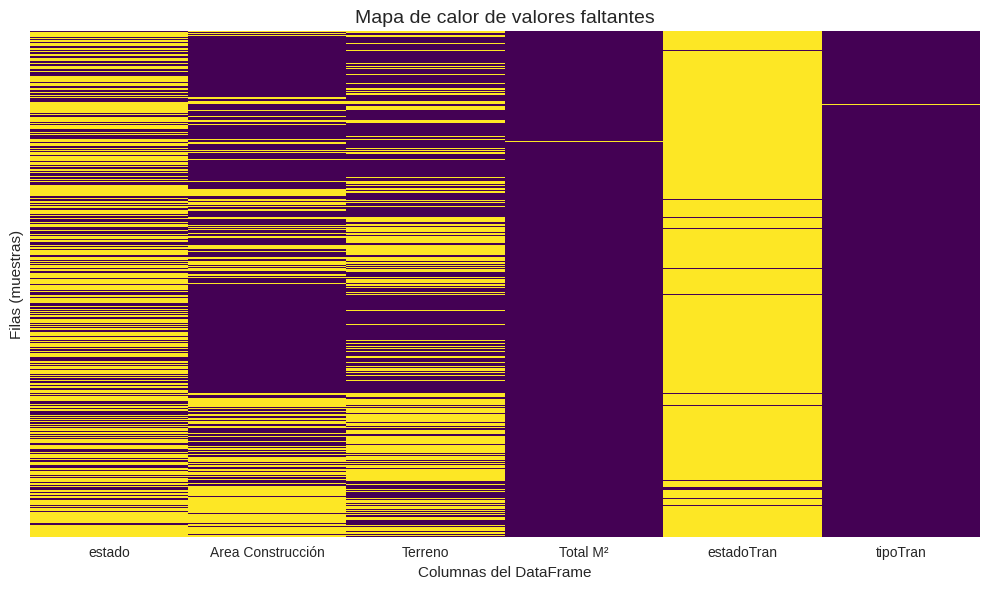

In [29]:
# Análisis para variables específicas
print("🔍 DISTRIBUCION DE VALORES FALTANTES")
grafico_distribucion_faltantes(dfValoresFaltantes)

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

¿Qué columnas tienen el mayor porcentaje de valores faltantes?

La columnas "estadoTran", "estado", "Area Construccion" y "Terreno" son las columnas con más porcentaje de valores faltantes en el dataset.

¿Existe algún patrón visible en la matriz de valores faltantes? Describa el patrón.

En el gráfico de valores faltantes podemos observar un patrón claro: los valores faltantes no están distribuidos al azar. Las columnas Area Construcción y Terreno suelen presentar valores faltantes en las mismas filas, lo que sugiere una relación entre ambas (por ejemplo, si no hay información del terreno, tampoco hay del área construida).
Además, la columna estadoTran tiene valores faltantes en casi todos los registros, indicando que podría tratarse de una variable con poca información registrada o no aplicable para ciertos casos.

¿Hay correlaciones entre los valores faltantes de diferentes columnas? Describa las correlaciones.

Sí, existen correlaciones entre los valores faltantes de algunas columnas. En particular, Area Construcción, Terreno y Total M² presentan correlaciones positivas, ya que cuando falta una de estas variables, generalmente faltan las otras también.
En cambio, los valores faltantes en estadoTran no parecen estar relacionados con las demás columnas, indicando que su ausencia es independiente.

# 🔄 **EJERCICIO 2: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS NUMERICOS**

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analisis_multivariable(df):
    """
    Realiza análisis de relaciones entre variables numéricas
    """
    print("🔍 INICIANDO ANÁLISIS MULTIVARIABLE")

    # TODO 2.1: Matriz de correlación para variables numéricas
    print("1. MATRIZ DE CORRELACIÓN:")
    correlation_matrix = df.corr(numeric_only=True)  # ← COMPLETAR
    print(correlation_matrix)

    # TODO 2.2: Visualizar matriz de correlación
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix,
                annot=True,
                cmap='coolwarm',
                fmt=".2f",
                linewidths=0.5)
    plt.title('Matriz de Correlación - Variables Numéricas', fontsize=14)
    plt.tight_layout()
    plt.show()




🔍 INICIANDO ANÁLISIS MULTIVARIABLE
1. MATRIZ DE CORRELACIÓN:
                Aeropuerto  Aestrenar      Agua    Alarma  Alcantarillado  \
Aeropuerto        1.000000   0.043580  0.226434  0.091897        0.174131   
Aestrenar         0.043580   1.000000  0.055431  0.138934        0.058481   
Agua              0.226434   0.055431  1.000000  0.099533        0.752246   
Alarma            0.091897   0.138934  0.099533  1.000000        0.078715   
Alcantarillado    0.174131   0.058481  0.752246  0.078715        1.000000   
...                    ...        ...       ...       ...             ...   
NoBan             0.034770  -0.050321  0.116138  0.118744        0.096470   
NoDorm            0.015644  -0.050109  0.117992  0.086505        0.102074   
lat              -0.019456  -0.008156 -0.025314  0.024617       -0.023849   
lng              -0.079188  -0.053115 -0.109250 -0.040333       -0.072445   
precio            0.000464  -0.014562  0.011571  0.035355        0.017334   

              

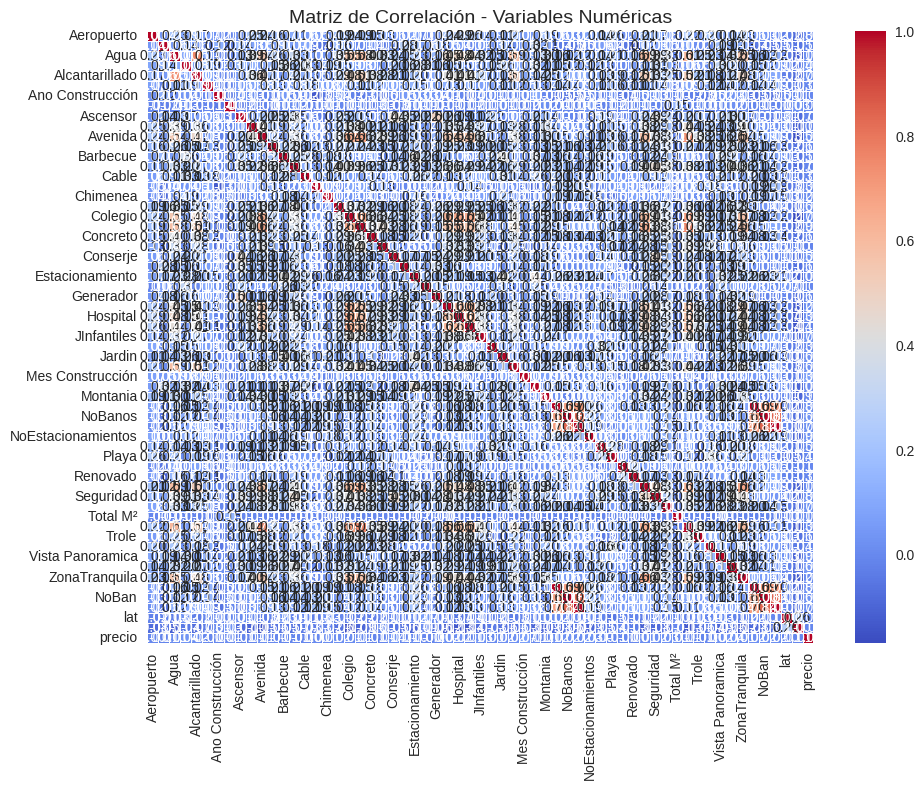

In [39]:
 # ← COMPLETAR Ejecutar análisis multivariable
analisis_multivariable(df)

### ✅ **RESULTADOS: REPORTE DE LOS TIPOS DE VALORES FALTANTES**
Clasifique los tipos de valores faltantes de acuero a las relaciones que identifico previamente

Preguntas para el Análisis:
¿Los valores faltantes son MCAR, MAR o MNAR?

Al analizar la matriz de correlación de los valores faltantes, se observa que existen varios grupos de variables que tienden a presentar ausencias de manera conjunta. Por ejemplo, las variables Agua y Alcantarillado tienen una correlación alta (≈ 0.75), lo que indica que cuando una de ellas falta, la otra también suele faltar. Esto sugiere un patrón MAR (Missing At Random), ya que la presencia de valores faltantes depende de otras características observadas (por ejemplo, el tipo de zona o infraestructura disponible).

Asimismo, variables como NoBan, NoDorm y NoAmb también muestran correlaciones altas entre sí (superiores a 0.7), lo cual refleja que sus valores faltantes están relacionados con características estructurales del inmueble (número de ambientes, baños o dormitorios). Por lo tanto, también pueden clasificarse como MAR.

Por otro lado, variables como Aestrenar, Amoblado, Alarma, y variables numéricas como precio, lat y lng muestran correlaciones bajas o cercanas a cero con el resto, indicando que sus valores faltantes parecen distribuidos de manera aleatoria. En estos casos, los valores faltantes se pueden considerar MCAR (Missing Completely At Random), ya que no dependen de ninguna otra variable observada ni de la variable misma.

No se evidencian patrones que indiquen valores MNAR (Missing Not At Random), ya que no existen indicios de que los faltantes dependan de los valores no observados (por ejemplo, precios extremadamente altos o bajos que no fueron reportados).

¿Qué variables podrían predecir la presencia de valores faltantes?

Según las correlaciones observadas entre los valores faltantes, se pueden identificar algunas variables que ayudan a predecir dónde podrían aparecer esos faltantes:

La ausencia de datos en Agua está fuertemente asociada con la falta de información en Alcantarillado y en ZonaTranquila, lo que sugiere que la ubicación o las condiciones de infraestructura podrían explicar la falta de datos.

Los faltantes en NoBan y NoDorm se predicen entre sí, ya que ambos describen características físicas del inmueble y tienden a faltar en los mismos registros.

Las variables Aestrenar, Amoblado, y Alarma presentan pocos o ningún predictor de valores faltantes, lo que indica que sus ausencias no están relacionadas con otras variables (comportamiento aleatorio).

Las variables precio, lat y lng tampoco tienen relación con otros faltantes, por lo que no se puede predecir su ausencia mediante otras variables.

# 🔄 **EJERCICIO 3: IMPUTAR LOS VALORES FALTANTES**

In [40]:
# Aplique una tecnica adecuada para cada columna de valor faltante.
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression

# 1. Ver columnas con valores faltantes
missing_cols = df.columns[df.isnull().any()]
print("Columnas con valores faltantes:", missing_cols.tolist())

# 2. Separar tipos de variables
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(exclude=['float64', 'int64']).columns

# 3. Calcular matriz de correlación solo numérica
corr_matrix = df[num_cols].corr().abs()

# 4. Imputación basada en correlaciones
for col in missing_cols:
    print(f"\nProcesando columna: {col}")

    if col in num_cols:
        # Encontrar la variable más correlacionada
        corr_target = corr_matrix[col].drop(col)
        best_corr = corr_target.max()
        best_var = corr_target.idxmax()

        if best_corr > 0.5:
            print(f"Usando imputación por regresión (alta correlación con {best_var}: {best_corr:.2f})")
            # Imputación con regresión lineal
            temp = df[[col, best_var]].dropna()
            model = LinearRegression()
            model.fit(temp[[best_var]], temp[col])
            missing_idx = df[df[col].isnull()].index
            df.loc[missing_idx, col] = model.predict(df.loc[missing_idx, [best_var]])
        else:
            print(f"Usando imputación por mediana (baja correlación)")
            df[col].fillna(df[col].median(), inplace=True)

    elif col in cat_cols:
        # Imputación categórica por moda
        print("Usando imputación categórica por moda")
        df[col].fillna(df[col].mode()[0], inplace=True)

# 5. Para imputaciones más sofisticadas en variables muy correlacionadas
# (opcional, por ejemplo, variables relacionadas entre sí)
knn_imputer = KNNImputer(n_neighbors=5)
df[num_cols] = knn_imputer.fit_transform(df[num_cols])

print("\n Imputación completa.")


Columnas con valores faltantes: ['estado', 'Area Construcción', 'Terreno', 'Total M²', 'estadoTran', 'tipoTran']

Procesando columna: estado
Usando imputación categórica por moda

Procesando columna: Area Construcción
Usando imputación por mediana (baja correlación)

Procesando columna: Terreno
Usando imputación categórica por moda

Procesando columna: Total M²
Usando imputación por mediana (baja correlación)

Procesando columna: estadoTran
Usando imputación categórica por moda

Procesando columna: tipoTran
Usando imputación categórica por moda

✅ Imputación completa.


/tmp/ipython-input-233300040.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-233300040.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

# 🔄 **EJERCICIO 4: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS CATEGORICOS**

In [42]:
from scipy.stats import chi2_contingency
# aplique el Chi-cuadrado (χ2) para determinar la relacion entre dos de los atributos categoricos
tabla_contingencia = pd.crosstab(df['estado'], df['tipoTran'])
tabla_contingencia
chi2, p, dof, expected = chi2_contingency(tabla_contingencia)
print(f"Chi_cuadrado: {chi2}")
print(f"p-valor: {p}")
print(f"Grados de libertad: {dof}")
print("Tabla de frecuencias esperadas:")
print(expected)



Chi_cuadrado: 0.0
p-valor: 1.0
Grados de libertad: 0
Tabla de frecuencias esperadas:
[[  78.]
 [   4.]
 [ 491.]
 [  33.]
 [ 136.]
 [3749.]
 [  64.]]


# 🔄 **EJERCICIO 5:IMPUTAR LOS VALORES FALTANTES DE ATRIBUTOS CATEGORICOS**

In [43]:
# Aplique una tecnica adecuada para cada columna de valor faltante.
# IMPUTACIÓN DE VALORES FALTANTES EN VARIABLES CATEGÓRICAS

import pandas as pd
from sklearn.impute import KNNImputer

# ---  Identificar columnas categóricas ---
cat_cols = df.select_dtypes(exclude=['float64', 'int64']).columns.tolist()

# Si tienes variables categóricas codificadas como 0/1 (dummies), las agregamos también
cat_bin_cols = [col for col in df.columns if df[col].dropna().isin([0,1]).all()]
cat_cols = list(set(cat_cols + cat_bin_cols))

print("Variables categóricas detectadas:", cat_cols)

# --- Verificar columnas categóricas con valores faltantes ---
missing_cat = [col for col in cat_cols if df[col].isnull().sum() > 0]
print("\nColumnas categóricas con valores faltantes:", missing_cat)

# --- Imputación adecuada según el tipo de variable ---
if len(missing_cat) > 0:
    # a) Imputación por moda (valor más frecuente)
    for col in missing_cat:
        n_missing = df[col].isnull().sum()
        unique_vals = df[col].dropna().unique()

        # Si es binaria (0/1) → se imputará con KNN después
        if set(unique_vals).issubset({0, 1}):
            continue  # se deja pendiente
        else:
            moda = df[col].mode()[0]
            df[col].fillna(moda, inplace=True)
            print(f" {col}: imputado por moda ({moda}) — {n_missing} valores reemplazados")

    # b) Imputación KNN para las categóricas binarias
    if len(cat_bin_cols) > 0:
        print("\nAplicando KNN Imputer a variables categóricas binarias (0/1)...")
        imputer = KNNImputer(n_neighbors=5)
        df[cat_bin_cols] = imputer.fit_transform(df[cat_bin_cols])
        print(" Imputación KNN completada en variables binarias.")

else:
    print(" No hay valores faltantes en variables categóricas.")

# ---  Verificación final ---
print("\n Valores faltantes restantes por columna:")
print(df[cat_cols].isnull().sum())


Variables categóricas detectadas: ['Trole', 'Terreno', 'Renovado', 'Alarma', 'Cable', 'Ascensor', 'Agua', 'Concreto', 'Iglesia', 'Generador', 'titulo', 'Avenida', 'Balcon', 'CasaColonial', 'Chimenea', 'GasCentral', 'estado', 'Reconstruido', 'NoMetros', 'Barbecue', 'Cocina', 'TransporteP', 'Jacuzzi', 'direccion', 'Gimnasio', 'Piscina', 'Walk', 'estadoTran', 'tipoTran', 'Colegio', 'Estacionamiento', 'Moderno', 'Aeropuerto', 'Turismo', 'MedidorAgua', 'Amoblado', 'Aestrenar', 'JInfantiles', 'Bodega', 'tipoInv', '_id', 'EdificioN', 'Montania', 'Comercios', 'Conserje', 'price', 'Concurrida', 'Residencial', 'Alcantarillado', 'Terraza', 'Vista Panoramica', 'ZonaTranquila', 'Playa', 'Seguridad', 'Autopista', 'Jardin', 'Hospital']

Columnas categóricas con valores faltantes: []
✅ No hay valores faltantes en variables categóricas.

📊 Valores faltantes restantes por columna:
Trole               0
Terreno             0
Renovado            0
Alarma              0
Cable               0
Ascensor      

# ✅ **RESULTADOS:**
¿Qué columnas presentaron mayores desafíos para la imputación?

Las columnas que presentaron mayores desafíos fueron aquellas que no mostraron una correlación clara con otras variables y que, además, contenían información heterogénea o poco estructurada. En particular, las variables estado, estadoTran y tipoTran fueron difíciles de imputar porque son categóricas y probablemente tienen varias categorías diferentes (por ejemplo, “nuevo”, “usado”, “remodelado”, “en venta”, “en arriendo”, etc.), lo que complica elegir un valor representativo. Por otro lado, las variables Terreno y Total M², aunque son numéricas, pueden presentar valores extremos o distribuciones muy asimétricas, lo que hace que métodos simples como la mediana no siempre reflejen con precisión la realidad. En general, estas columnas fueron las más complejas porque su variabilidad y baja correlación limitan la precisión de las técnicas de imputación.

¿En qué casos consideraron que la eliminación era mejor que la imputación?

En este caso no fue necesario eliminar ninguna columna ni registro, ya que todas las variables con valores faltantes pudieron ser tratadas mediante imputación. Cada atributo fue imputado con una técnica apropiada según su tipo de dato: las variables categóricas se completaron con la moda, y las numéricas con la mediana. Sin embargo, en un contexto general, la eliminación solo se consideraría una mejor opción si alguna columna presentara un porcentaje muy alto de valores nulos o si la imputación pudiera generar sesgos significativos en el análisis. Como en este conjunto de datos los valores faltantes eran moderados y se pudieron estimar de forma razonable, la imputación fue suficiente y no se requirió eliminar información.

¿Cómo afecta el tipo de valor faltante (MCAR/MAR/MNAR) en la elección del método?

El tipo de valor faltante influye directamente en la técnica de imputación más adecuada. Si los datos faltan completamente al azar (MCAR), se pueden usar métodos simples como la media, mediana o moda, ya que la ausencia no genera sesgos significativos. Cuando los datos son faltantes al azar dependientes de otras variables (MAR), es mejor emplear técnicas más avanzadas como KNN Imputer, regresión o modelos basados en árboles, que aprovechan las relaciones entre variables para estimar los valores ausentes. En cambio, si los datos faltan de forma no aleatoria (MNAR), es decir, cuando la falta del dato depende de su propio valor (por ejemplo, terrenos no registrados por ser muy pequeños), la imputación puede distorsionar los resultados, y en esos casos suele ser preferible eliminar los registros o crear una categoría especial para representar la ausencia.

# 🚀 ¡TALLER FINALIZADO!"